# Plots of the yield models used in R68 analysis

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

exec(open("nb_setup.py").read())
import R68_yield as Yield
import R68_plot_tools as pt

../mplstyles
3.1.1
/data/chocula/mast/cdms/analysis/run068/R68_paper2019/mplstyles
dict_keys(['xx', 'yy', 'ex', 'ey'])


We consider here 4 different yield model paramterizations. The first is Lindhard (http://gymarkiv.sdu.dk/MFM/kdvs/mfm%2030-39/mfm-33-10.pdf).
\begin{equation}
y_L(E_r,k) = \frac{kg}{1+kg}
\end{equation}
where $g = 3 \varepsilon^{0.15} + 0.7\varepsilon^{0.6} + \varepsilon$ and $\varepsilon = 11.5 E_r [keV] Z^{-7/3}$ and here, Z=14 (Si).

Then two modifications from Chavarria (https://arxiv.org/pdf/1803.02903.pdf) and Sorensen(https://journals.aps.org/prd/pdf/10.1103/PhysRevD.91.083509) which both change the low-energy cutoff behavior. Chavarria is simply empirical while Sorensen is motivated by a low-energy ionization threshold such as in semiconductors.


\begin{equation}
y_C(E_r,k,a) = \left(\frac{1}{a E_r}+\frac{1}{y_L(E_r,k)}\right)^{-1}
\end{equation}

and 

\begin{equation}
y_S(E_r,k,q) = y_L(E_r,k)-\frac{q}{\varepsilon}
\end{equation}

Finally, another low energy modification used by Scholz (https://journals.aps.org/prd/pdf/10.1103/PhysRevD.94.122003) which introduces an "adiabatic correction factor" to turn off yield at some scale $\xi$.

\begin{equation}
y_{AC}(E_r,k,\xi)=(1-exp[-E_r/\xi])\times y_L(E_r,k)
\end{equation}

In [2]:
E_thresh=50 #[eV] Possible analysis threshold
E_test=np.logspace(-1,4,1000)

eVTOeps = 11.5*1/1000*14**(-7./3)

fig_w=7

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


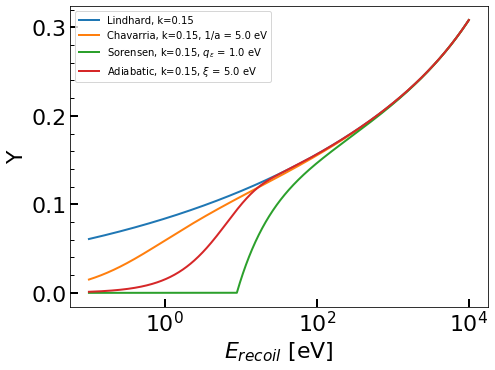

In [3]:
fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))

#Y=Yield.Yield('Damic',[])
#plt.plot(E_test,Y.calc(E_test),label='Damic')

k=0.15

Y=Yield.Yield('Lind',[k])
plt.plot(E_test,Y.calc(E_test),label='Lindhard, k={0:.2f}'.format(k))

#Y=Yield.Yield('Chav',[0.146,4e3])

ainv=5 #[eV]
Y=Yield.Yield('Chav',[0.15,ainv])
plt.plot(E_test,Y.calc(E_test),label='Chavarria, k={0:.2f}, 1/a = {1:.1f} eV'.format(k,ainv))

qeff_eV=1 #[eV]
Y=Yield.Yield('Sor',[0.15,qeff_eV*eVTOeps])
plt.plot(E_test,Y.calc(E_test),label='Sorensen, k={0:.2f}, $q_\epsilon$ = {1:.1f} eV'.format(k,qeff_eV))

xi=5 #[eV]
Y=Yield.Yield('AC',[0.15,xi])
plt.plot(E_test,Y.calc(E_test),label=r'Adiabatic, k={0:.2f}, $\xi$ = {1:.1f} eV'.format(k,xi))

ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Y')
ax.set_xscale('log')
#ax.set_xlim(0,10)
#ax.set_xlim(1e2,1e5)

#ax.set_yscale('log')
#ax.set_ylim(1e-1,0.5)


#pt.plotOldYs(plt.gca())

#plt.legend(loc="upper left")
plt.legend()
plt.tight_layout()
#plt.savefig('figures/yield_models.png')

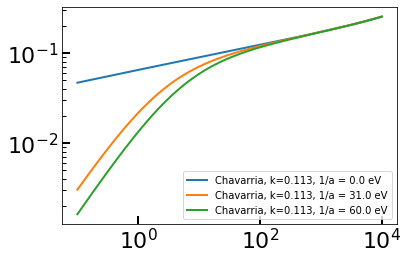

In [4]:
Y=Yield.Yield('Chav',[0.113,0])
plt.plot(E_test,Y.calc(E_test),label='Chavarria, k=0.113, 1/a = {0:.1f} eV'.format(round(0)))

Y=Yield.Yield('Chav',[0.114,31])
plt.plot(E_test,Y.calc(E_test),label='Chavarria, k=0.113, 1/a = {0:.1f} eV'.format(round(31)))
Y=Yield.Yield('Chav',[0.114,60])
plt.plot(E_test,Y.calc(E_test),label='Chavarria, k=0.113, 1/a = {0:.1f} eV'.format(round(60)))


plt.gca().set_xscale('log')
plt.gca().set_yscale('log')

plt.legend()

In [5]:
Y=Yield.Yield('AC',[0.15,xi])

In [6]:
Y.set_model('Lind')
Y.set_pars([4,2])
Y.npars

Error: Lind yield model takes 1 parameter(s), but 2 are given.


2

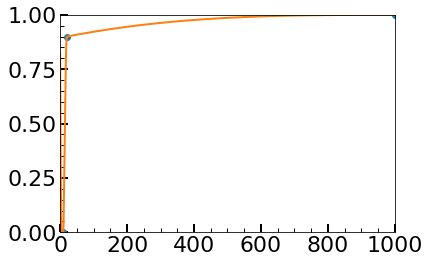

In [7]:
#Play with homemade yield turn-offs
from scipy.interpolate import CubicSpline, PchipInterpolator

#Specify a couple fixed points
Er_fixed=np.array([1e1,1e2,1e3])
f_fixed=np.array([0.05,0.1,0.2])

#cs = CubicSpline(Er_fixed, Y_fixed,bc_type=((1,0),(1,0)))
#pci = PchipInterpolator(Er_fixed, Y_fixed)

#Modify Lindhard with an "adiabatic" factor
Er_ad=np.array([1e1,2e1,1e3])
f_ad=np.array([0,0.9,1])

f_pci = PchipInterpolator(Er_ad, f_ad)

plt.plot(Er_ad,f_ad,'o')
plt.plot(E_test,f_pci(E_test))
plt.xlim(0,Er_ad[-1])
plt.ylim(0,1)

#Scale down Lind
def yLind_pchip(Er,k,Er0,Er1,Er2,f1):
    Er_ad=np.array([Er0,Er1,Er2])
    f_ad=np.array([0,f1,1])

    f_pci = PchipInterpolator(Er_ad, f_ad)
    
    y=Yield.yLind(Er, k)
    y[Er<Er_ad[-1]]*=f_pci(Er[Er<Er_ad[-1]])
    y[Er<Er_ad[0]]=0
    return y

#Take over from Lind below Er2
def yLind_pchip(Er,k,Er0,Er1,Er2,f1):
    Er_ad=np.array([Er0,Er1,Er2])
    f_ad=np.array([0,f1,1])

    f_pci = PchipInterpolator(Er_ad, f_ad)
    
    y=Yield.yLind(Er, k)
    y[Er<Er_ad[-1]]=f_pci(Er[Er<Er_ad[-1]])*(y[Er>Er_ad[-1]][0])
    y[Er<Er_ad[0]]=0
    return y

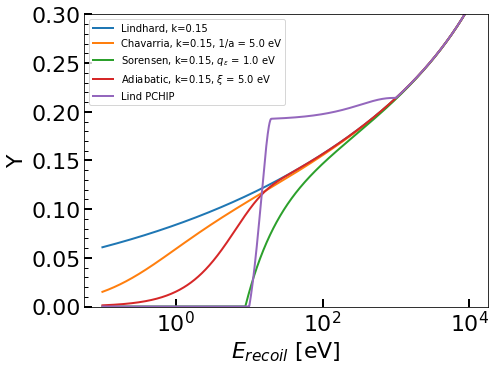

In [8]:
fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))

k=0.15

Y=Yield.Yield('Lind',[k])
plt.plot(E_test,Y.calc(E_test),label='Lindhard, k={0:.2f}'.format(k))

ainv=5 #[eV]
Y=Yield.Yield('Chav',[0.15,ainv])
plt.plot(E_test,Y.calc(E_test),label='Chavarria, k={0:.2f}, 1/a = {1:.1f} eV'.format(k,ainv))

qeff_eV=1 #[eV]
Y=Yield.Yield('Sor',[0.15,qeff_eV*eVTOeps])
plt.plot(E_test,Y.calc(E_test),label='Sorensen, k={0:.2f}, $q_\epsilon$ = {1:.1f} eV'.format(k,qeff_eV))

xi=5 #[eV]
Y=Yield.Yield('AC',[0.15,xi])
plt.plot(E_test,Y.calc(E_test),label=r'Adiabatic, k={0:.2f}, $\xi$ = {1:.1f} eV'.format(k,xi))

#plt.plot(Er_fixed,Y_fixed,'ko')
#plt.plot(E_test,cs(E_test),label='Cubic Spline')
#plt.plot(E_test,pci(E_test),label='Monotone')

Y=Yield.Yield('pchip',[0.15,1e1,2e1,1e3,0.9])
Y.solve()
plt.plot(E_test,Y.calc(E_test),label='Lind PCHIP')


ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Y')
ax.set_xscale('log')

#ax.set_xlim(0,10)

#ax.set_yscale('log')
ax.set_ylim(0,0.3)


#pt.plotOldYs(plt.gca())

#plt.legend(loc="upper left")
plt.legend()
plt.tight_layout()

In [9]:
from scipy.optimize import curve_fit
#Try to fit other yield models with PCHIP+Lindhard

bounds=(0,np.inf)
k=0.15
Y=Yield.Yield('Lind',[k])
popt_l,pcov=curve_fit(yLind_pchip,E_test,Y.calc(E_test),p0=[0.15,0,10,100,0.5],bounds=bounds)

ainv=5 #[eV]
Y=Yield.Yield('Chav',[0.15,ainv])
popt_c,pcov=curve_fit(yLind_pchip,E_test,Y.calc(E_test),p0=[0.15,0,1,5,0.5],bounds=bounds)

qeff_eV=1 #[eV]
Y=Yield.Yield('Sor',[0.15,qeff_eV*eVTOeps])
popt_s,pcov=curve_fit(yLind_pchip,E_test,Y.calc(E_test),p0=[0.15,10,50,200,0.5],bounds=bounds)

xi=5 #[eV]
Y=Yield.Yield('AC',[0.15,xi])
popt_a,pcov=curve_fit(yLind_pchip,E_test,Y.calc(E_test),p0=[0.15,0,1,5,0.5],bounds=bounds)


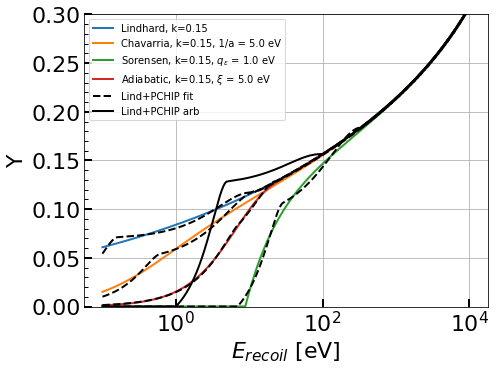

In [10]:
fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))

k=0.15

Y=Yield.Yield('Lind',[k])
plt.plot(E_test,Y.calc(E_test),label='Lindhard, k={0:.2f}'.format(k))

ainv=5 #[eV]
Y=Yield.Yield('Chav',[0.15,ainv])
plt.plot(E_test,Y.calc(E_test),label='Chavarria, k={0:.2f}, 1/a = {1:.1f} eV'.format(k,ainv))

qeff_eV=1 #[eV]
Y=Yield.Yield('Sor',[0.15,qeff_eV*eVTOeps])
plt.plot(E_test,Y.calc(E_test),label='Sorensen, k={0:.2f}, $q_\epsilon$ = {1:.1f} eV'.format(k,qeff_eV))

xi=5 #[eV]
Y=Yield.Yield('AC',[0.15,xi])
plt.plot(E_test,Y.calc(E_test),label=r'Adiabatic, k={0:.2f}, $\xi$ = {1:.1f} eV'.format(k,xi))

#plt.plot(Er_fixed,Y_fixed,'ko')
#plt.plot(E_test,cs(E_test),label='Cubic Spline')
#plt.plot(E_test,pci(E_test),label='Monotone')


plt.plot(E_test,yLind_pchip(E_test,*popt_l),'k--',label='Lind+PCHIP fit')
plt.plot(E_test,yLind_pchip(E_test,*popt_c),'k--')
plt.plot(E_test,yLind_pchip(E_test,*popt_s),'k--')
plt.plot(E_test,yLind_pchip(E_test,*popt_a),'k--')

Y=Yield.Yield('pchip',[0.15,1,5,100,0.82])
Y.solve()
plt.plot(E_test,Y.calc(E_test),'k-',label='Lind+PCHIP arb')

ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Y')
ax.set_xscale('log')

#ax.set_xlim(0,10)

#ax.set_yscale('log')
ax.set_ylim(0,0.3)

plt.grid()

#pt.plotOldYs(plt.gca())

#plt.legend(loc="upper left")
plt.legend()
plt.tight_layout()
plt.savefig('figures/PCHIPyield_model_example.png')

In [11]:
#k: Lindhard k
#Yshelf: Value of flat yield shelf
#Ec: cutoff energy at which Y->0 [eV]
#dE: width of cutoff transition [eV]
#alpha: smoothing parameter between shelf and lindhard
def yLind_shelf_exp(Er,k,Yshelf,Ec,dE,alpha):
    yL=Yield.yLind(Er, k)

    return (Er>Ec)*(1-np.exp(-(Er-Ec)/dE))*np.power(np.power(yL,alpha)+np.power(Yshelf,alpha),1/alpha)


from scipy.optimize import curve_fit
#Try to fit other yield models with Lindhard+exp

bounds=(0,np.inf)
k=0.15
Y=Yield.Yield('Lind',[k])
popt_l,pcov=curve_fit(yLind_shelf_exp,E_test,Y.calc(E_test),p0=[0.15,0.1,5e0,1e1,10],bounds=bounds)
print(popt_l)

ainv=5 #[eV]
Y=Yield.Yield('Chav',[0.15,ainv])
popt_c,pcov=curve_fit(yLind_shelf_exp,E_test,Y.calc(E_test),p0=[0.15,0.1,5e0,1e1,10],bounds=bounds)
print(popt_c)

qeff_eV=1 #[eV]
Y=Yield.Yield('Sor',[0.15,qeff_eV*eVTOeps])
popt_s,pcov=curve_fit(yLind_shelf_exp,E_test,Y.calc(E_test),p0=[0.15,0.1,5e0,1e1,10],bounds=bounds)
print(popt_s)

xi=5 #[eV]
Y=Yield.Yield('AC',[0.15,xi])
popt_a,pcov=curve_fit(yLind_shelf_exp,E_test,Y.calc(E_test),p0=[0.15,0.1,5e0,1e1,10],bounds=bounds)
print(popt_a)

[1.50000000e-01 6.03212893e-02 7.19097591e-02 4.02331202e-03
 1.90426485e+02]
[1.47982784e-01 8.97364619e-02 6.16913025e-09 8.58333147e-01
 7.46800553e+01]
[ 0.14750023  0.0336585   7.05001645 15.78174277 12.66047515]
[1.50000000e-01 3.60490077e-02 6.77461047e-09 5.00000001e+00
 1.95544180e+01]


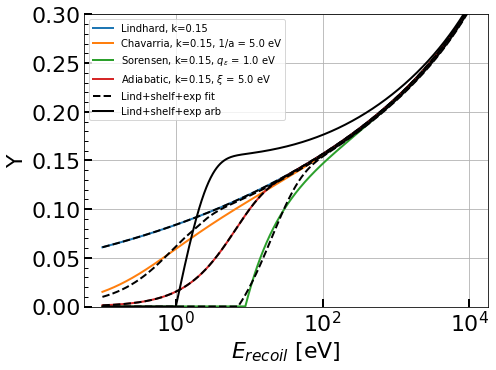

In [12]:
fig,ax = plt.subplots(1,1,figsize=(fig_w, fig_w*(.75)))

k=0.15

Y=Yield.Yield('Lind',[k])
plt.plot(E_test,Y.calc(E_test),label='Lindhard, k={0:.2f}'.format(k))

ainv=5 #[eV]
Y=Yield.Yield('Chav',[0.15,ainv])
plt.plot(E_test,Y.calc(E_test),label='Chavarria, k={0:.2f}, 1/a = {1:.1f} eV'.format(k,ainv))

qeff_eV=1 #[eV]
Y=Yield.Yield('Sor',[0.15,qeff_eV*eVTOeps])
plt.plot(E_test,Y.calc(E_test),label='Sorensen, k={0:.2f}, $q_\epsilon$ = {1:.1f} eV'.format(k,qeff_eV))

xi=5 #[eV]
Y=Yield.Yield('AC',[0.15,xi])
plt.plot(E_test,Y.calc(E_test),label=r'Adiabatic, k={0:.2f}, $\xi$ = {1:.1f} eV'.format(k,xi))


plt.plot(E_test,yLind_shelf_exp(E_test,*popt_l),'k--',label='Lind+shelf+exp fit')
plt.plot(E_test,yLind_shelf_exp(E_test,*popt_c),'k--')
plt.plot(E_test,yLind_shelf_exp(E_test,*popt_s),'k--')
plt.plot(E_test,yLind_shelf_exp(E_test,*popt_a),'k--')

Y=Yield.Yield('Shexp',[0.15,0.15,1e0,1e0,5])
plt.plot(E_test,Y.calc(E_test),'-k',label='Lind+shelf+exp arb')


ax.set_xlabel(r'$E_{recoil}$ [eV]')
ax.set_ylabel('Y')
ax.set_xscale('log')
ax.set_ylim(0,0.3)

plt.grid()

plt.legend()
plt.tight_layout()